In [2]:
import pandas as pd
import numpy as np
import requests
import io
import datetime as dt
import matplotlib.pyplot as plt



%matplotlib inline



In [6]:
#Define functions for getting data frame from MTA url
#'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt'
def get_data(url):
    s = requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    return df

get_data('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,00:00:00,REGULAR,6667980,2260145
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,04:00:00,REGULAR,6667999,2260154
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,08:00:00,REGULAR,6668012,2260170
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,12:00:00,REGULAR,6668092,2260242


In [152]:
df = get_data('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066


In [116]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [153]:
df.rename(columns={column:column.strip() for column in df.columns}, inplace=True)
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [118]:
len(df['STATION'].unique())

377

In [154]:
df['ENTRIES_COUNT'] = df.ENTRIES.diff()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0


In [155]:
df['EXITS_COUNT'] = df.EXITS.diff()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0


In [133]:
df.isnull().sum()

C/A              0
UNIT             0
SCP              0
STATION          0
LINENAME         0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
ENTRIES_COUNT    1
EXITS_COUNT      1
DATE_TIME        0
dtype: int64

In [156]:
df.dropna(inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0


In [122]:
df.sort_values('ENTRIES_COUNT')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT
53009,N078,R175,01-03-01,14 ST,ACEL,IND,06/23/2018,01:00:00,REGULAR,12593022,14885474,-2.117260e+09,-1.141564e+09
125128,R116,R030,00-00-03,CHAMBERS ST,123,IRT,06/23/2018,00:00:00,REGULAR,99259,70379,-2.115421e+09,-1.712442e+09
87272,N400A,R359,02-00-04,COURT SQ,EMG,IND,06/23/2018,00:00:00,REGULAR,1389351,1212701,-2.065991e+09,-6.805550e+08
48179,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,06/23/2018,00:00:00,REGULAR,4792486,3623577,-2.028112e+09,-1.687281e+09
39246,J034,R007,00-00-03,104 ST,JZ,BMT,06/23/2018,00:00:00,REGULAR,4385202,4679752,-2.021585e+09,-6.174279e+08
22977,C021,R212,00-00-03,59 ST,NRW,BMT,06/23/2018,00:00:00,REGULAR,13329522,14188766,-2.016885e+09,-6.887857e+08
147741,R226,R131,02-03-00,23 ST,6,IRT,06/23/2018,01:00:00,REGULAR,10720872,12870234,-1.987803e+09,-1.532699e+09
164897,R311,R053,00-05-00,3 AV-149 ST,25,IRT,06/23/2018,00:00:00,REGULAR,45,0,-1.962843e+09,-7.213617e+08
168342,R333,R366,00-00-02,225 ST,25,IRT,06/23/2018,01:00:00,REGULAR,48962,33770,-1.953176e+09,-6.641570e+08
164483,R310,R053,01-00-03,3 AV-149 ST,25,IRT,06/23/2018,00:00:00,REGULAR,5074443,854399,-1.938435e+09,-1.241005e+09


In [123]:
(abs(df['ENTRIES_COUNT']) > 100000).value_counts()

False    192455
True       4235
Name: ENTRIES_COUNT, dtype: int64

In [124]:
(abs(df['EXITS_COUNT']) > 100000).value_counts()

False    192621
True       4069
Name: EXITS_COUNT, dtype: int64

In [157]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,DATE_TIME
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0,2018-06-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0,2018-06-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0,2018-06-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0,2018-06-23 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0,2018-06-23 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,00:00:00,REGULAR,6667980,2260145,161.0,33.0,2018-06-24 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,04:00:00,REGULAR,6667999,2260154,19.0,9.0,2018-06-24 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,08:00:00,REGULAR,6668012,2260170,13.0,16.0,2018-06-24 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,12:00:00,REGULAR,6668092,2260242,80.0,72.0,2018-06-24 12:00:00
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,16:00:00,REGULAR,6668269,2260281,177.0,39.0,2018-06-24 16:00:00


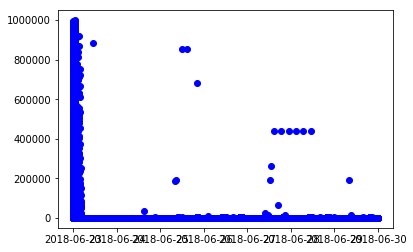

In [166]:
plt.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo')

In [164]:
def entries_cleaner(row, max_counter):
    counter = row["ENTRIES_COUNT"]
    if abs(counter) > max_counter:
        #time = row['DATE_TIME'].time
        return 0
    elif counter < 0:
        counter = -counter
    return counter

df["ENTRIES_COUNT"] = df.apply(entries_cleaner, axis=1, max_counter=1000000)

df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,DATE_TIME
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0,2018-06-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0,2018-06-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0,2018-06-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0,2018-06-23 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0,2018-06-23 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,00:00:00,REGULAR,6667980,2260145,161.0,33.0,2018-06-24 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,04:00:00,REGULAR,6667999,2260154,19.0,9.0,2018-06-24 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,08:00:00,REGULAR,6668012,2260170,13.0,16.0,2018-06-24 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,12:00:00,REGULAR,6668092,2260242,80.0,72.0,2018-06-24 12:00:00
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,16:00:00,REGULAR,6668269,2260281,177.0,39.0,2018-06-24 16:00:00


In [165]:
(abs(df['ENTRIES_COUNT']) > 1000000).value_counts()

False    196689
Name: ENTRIES_COUNT, dtype: int64

In [30]:
df['FTRAFFIC'] = df.REAL_EXITS + df.REAL_ENTRIES
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,REAL_ENTRIES,REAL_EXITS,FTRAFFIC
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0,31.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0,45.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0,184.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0,289.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0,331.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,00:00:00,REGULAR,6667980,2260145,161.0,33.0,194.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,04:00:00,REGULAR,6667999,2260154,19.0,9.0,28.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,08:00:00,REGULAR,6668012,2260170,13.0,16.0,29.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,12:00:00,REGULAR,6668092,2260242,80.0,72.0,152.0


In [36]:
df.sort_values('FTRAFFIC')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,REAL_ENTRIES,REAL_EXITS,FTRAFFIC
91678,N501,R020,01-03-03,47-50 STS ROCK,BDFM,IND,06/23/2018,00:00:00,REGULAR,842858,578587,-1.922963e+09,-2.036579e+09,-3.959541e+09
125128,R116,R030,00-00-03,CHAMBERS ST,123,IRT,06/23/2018,00:00:00,REGULAR,99259,70379,-2.115421e+09,-1.712442e+09,-3.827864e+09
48179,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,06/23/2018,00:00:00,REGULAR,4792486,3623577,-2.028112e+09,-1.687281e+09,-3.715393e+09
58629,N101,R252,01-00-00,HIGH ST,AC,IND,06/23/2018,00:00:00,REGULAR,3399769,12269981,-1.910682e+09,-1.766810e+09,-3.677491e+09
161339,R288,R275,00-00-01,183 ST,4,IRT,06/23/2018,00:00:00,REGULAR,3313423,1848803,-1.777483e+09,-1.862991e+09,-3.640474e+09
3432,A025,R023,01-06-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/23/2018,00:00:00,REGULAR,10252273,25574698,-1.544188e+09,-2.024475e+09,-3.568663e+09
147741,R226,R131,02-03-00,23 ST,6,IRT,06/23/2018,01:00:00,REGULAR,10720872,12870234,-1.987803e+09,-1.532699e+09,-3.520502e+09
11365,A066,R118,00-00-01,CANAL ST,JNQRZ6W,BMT,06/23/2018,01:00:00,REGULAR,8321976,2811089,-1.716729e+09,-1.759773e+09,-3.476502e+09
104305,N600,R302,00-06-01,57 ST,F,IND,06/23/2018,01:00:00,REGULAR,9390830,6086416,-1.919220e+09,-1.537965e+09,-3.457185e+09
56740,N094,R029,01-05-00,WORLD TRADE CTR,ACE23,IND,06/23/2018,00:00:00,REGULAR,1271,9,-1.579686e+09,-1.829063e+09,-3.408750e+09


In [93]:
(abs(df['FTRAFFIC']) > 100000).value_counts()

False    192313
True       4377
Name: FTRAFFIC, dtype: int64

In [103]:
df[(abs(df['FTRAFFIC']) < 5000)].sort_values('FTRAFFIC')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,REAL_ENTRIES,REAL_EXITS,FTRAFFIC
190562,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,06/23/2018,00:00:00,REGULAR,2,894,-5642.0,894.0,-4748.0
94312,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,06/23/2018,00:00:00,REGULAR,0,2589,-7178.0,2589.0,-4589.0
50447,N067,R012,00-06-01,34 ST-PENN STA,ACE,IND,06/23/2018,00:00:00,REGULAR,0,906,-5472.0,906.0,-4566.0
192032,R634,R069,00-03-02,NEW LOTS AV,3,IRT,06/23/2018,00:00:00,REGULAR,752444,418420,119967.0,-124513.0,-4546.0
167592,R328,R361,00-05-01,PELHAM PKWY,25,IRT,06/23/2018,01:00:00,REGULAR,0,84,-4514.0,84.0,-4430.0
114561,PTH07,R550,00-01-06,CITY / BUS,1,PTH,06/23/2018,04:04:51,REGULAR,20509,17098,-6958.0,2855.0,-4103.0
43065,N013,R035,02-05-01,168 ST,AC1,IND,06/23/2018,00:00:00,REGULAR,0,621,-4615.0,621.0,-3994.0
105943,N604,R342,00-05-01,JAMAICA VAN WK,E,IND,06/23/2018,01:00:00,REGULAR,0,694,-4465.0,694.0,-3771.0
105397,N602,R259,00-05-01,ROOSEVELT ISLND,F,IND,06/23/2018,00:00:00,REGULAR,0,88,-3731.0,88.0,-3643.0
135583,R161B,R452,00-05-03,72 ST,123,IRT,06/23/2018,01:00:00,REGULAR,0,2035,-5529.0,2034.0,-3495.0
